# Machine learning in marketing and sales

### Objectif
Our objective is to help the company better understand its customers. To achieve this, we analyse a dataset in order to identify the specific characteristics of the groups the company aims to target.


### Dataset overview
The dataset contains demographic and socio-economic information about individuals. Each row represents one person, described through variables such as gender, marital status, age, education level, income, occupation, and settlement size. This data serves as the foundation for our analysis and clustering process.

### Importation of the dataset and first calculs

In [119]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns

df = pd.read_csv("segmentation data.csv")
df_features = df.drop(columns=["ID"])
print(df_features.describe())

               Sex  Marital status          Age   Education         Income  \
count  2000.000000     2000.000000  2000.000000  2000.00000    2000.000000   
mean      0.457000        0.496500    35.909000     1.03800  120954.419000   
std       0.498272        0.500113    11.719402     0.59978   38108.824679   
min       0.000000        0.000000    18.000000     0.00000   35832.000000   
25%       0.000000        0.000000    27.000000     1.00000   97663.250000   
50%       0.000000        0.000000    33.000000     1.00000  115548.500000   
75%       1.000000        1.000000    42.000000     1.00000  138072.250000   
max       1.000000        1.000000    76.000000     3.00000  309364.000000   

        Occupation  Settlement size  
count  2000.000000      2000.000000  
mean      0.810500         0.739000  
std       0.638587         0.812533  
min       0.000000         0.000000  
25%       0.000000         0.000000  
50%       1.000000         1.000000  
75%       1.000000         1.00

### Descriptive analysis of data
The descriptive statistics show a balanced population in terms of gender and marital status. The average age is around 36 years, with substantial variability. Most individuals have a high-school level of education and work as skilled employees. Income ranges widely, with a moderate right-skew. Finally, most people live in small to mid-sized cities rather than large urban areas. 

### Visualisation of the differents distributions

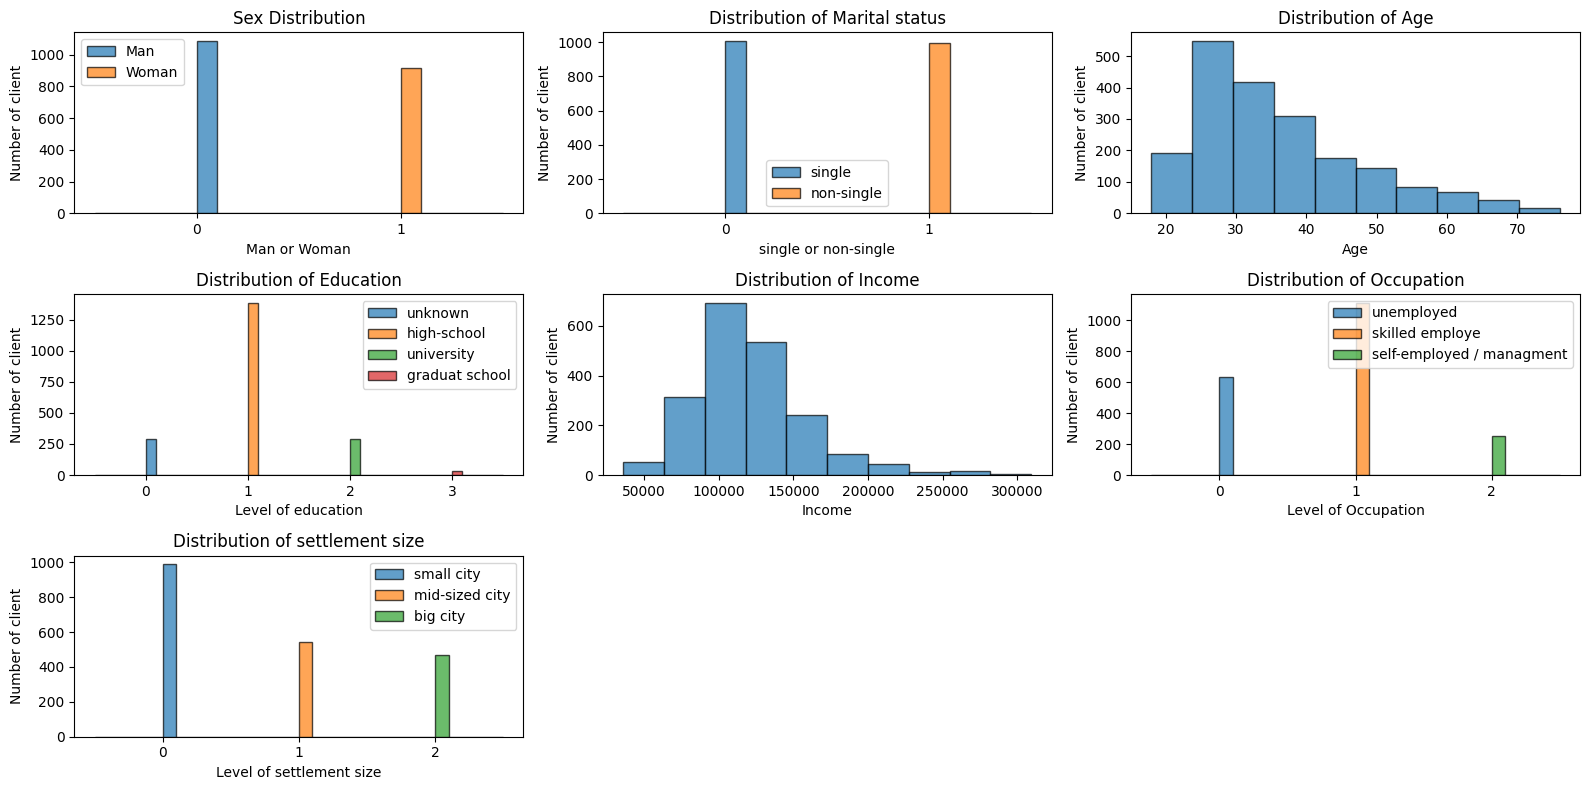

In [120]:
fig, axs = plt.subplots(3, 3, figsize=(16, 8))

axs = axs.flatten()  # simplifie l’accès : axs[0], axs[1], ...

# Désactiver les cases vides
for j in range(len(df_features.columns), len(axs)):
    axs[j].axis("off")

# Creat Sex distribution graph
data_0 = df[df["Sex"] == 0]["Sex"]
data_1 = df[df["Sex"] == 1]["Sex"]

axs[0].hist(data_0, edgecolor='black', alpha=0.7, label="Man")
axs[0].hist(data_1, edgecolor='black', alpha=0.7, label="Woman")
axs[0].set_xticks([0, 1])
axs[0].set_title("Sex Distribution")
axs[0].set_xlabel("Man or Woman")
axs[0].set_ylabel("Number of client")
axs[0].legend()

# Creat marital status
data_0 = df[df["Marital status"] == 0]["Marital status"]
data_1 = df[df["Marital status"] == 1]["Marital status"]

axs[1].hist(data_0, edgecolor='black', alpha=0.7, label="single")
axs[1].hist(data_1, edgecolor='black', alpha=0.7, label="non-single")
axs[1].set_xticks([0, 1])
axs[1].set_title("Distribution of Marital status")
axs[1].set_xlabel("single or non-single")
axs[1].set_ylabel("Number of client")
axs[1].legend()

# Creat Age distribution
axs[2].hist(df["Age"], edgecolor='black', alpha=0.7)
axs[2].set_title("Distribution of Age")
axs[2].set_xlabel("Age")
axs[2].set_ylabel("Number of client")

# Creat Education distribution
data_0 = df[df["Education"] == 0]["Education"]
data_1 = df[df["Education"] == 1]["Education"]
data_2 = df[df["Education"] == 2]["Education"]
data_3 = df[df["Education"] == 3]["Education"]

axs[3].hist(data_0, edgecolor='black', alpha=0.7, label="unknown")
axs[3].hist(data_1, edgecolor='black', alpha=0.7, label="high-school")
axs[3].hist(data_2, edgecolor='black', alpha=0.7, label="university")
axs[3].hist(data_3, edgecolor='black', alpha=0.7, label="graduat school")
axs[3].set_xticks([0, 1, 2, 3])
axs[3].set_title("Distribution of Education")
axs[3].set_xlabel("Level of education")
axs[3].set_ylabel("Number of client")
axs[3].legend()

# Creat Income distribution
axs[4].hist(df["Income"], edgecolor='black', alpha=0.7)
axs[4].set_title("Distribution of Income")
axs[4].set_xlabel("Income")
axs[4].set_ylabel("Number of client")

# Creat Occupation distribution
data_0 = df[df["Occupation"] == 0]["Occupation"]
data_1 = df[df["Occupation"] == 1]["Occupation"]
data_2 = df[df["Occupation"] == 2]["Occupation"]


axs[5].hist(data_0, edgecolor='black', alpha=0.7, label="unemployed")
axs[5].hist(data_1, edgecolor='black', alpha=0.7, label="skilled employe")
axs[5].hist(data_2, edgecolor='black', alpha=0.7, label="self-employed / managment")
axs[5].set_xticks([0, 1, 2])
axs[5].set_title("Distribution of Occupation")
axs[5].set_xlabel("Level of Occupation")
axs[5].set_ylabel("Number of client")
axs[5].legend()

# Creat settlement size
data_0 = df[df["Settlement size"] == 0]["Settlement size"]
data_1 = df[df["Settlement size"] == 1]["Settlement size"]
data_2 = df[df["Settlement size"] == 2]["Settlement size"]


axs[6].hist(data_0, edgecolor='black', alpha=0.7, label="small city")
axs[6].hist(data_1, edgecolor='black', alpha=0.7, label="mid-sized city")
axs[6].hist(data_2, edgecolor='black', alpha=0.7, label="big city")
axs[6].set_xticks([0, 1, 2])
axs[6].set_title("Distribution of settlement size")
axs[6].set_xlabel("Level of settlement size")
axs[6].set_ylabel("Number of client")
axs[6].legend()

plt.tight_layout()
plt.show()


### Graphics quick analysis
The dataset shows a diverse population in terms of gender and marital status.
Most individuals are young to middle-aged adults, with a peak around 30–40 years old.
Education levels are mostly concentrated around high-school and university, with very few people having graduate-school education.
Income displays a right-skewed distribution, with most clients earning between 80,000 and 150,000.
Regarding occupation, skilled employees represent the largest proportion, while only a minority are unemployed or self-employed.
Finally, most clients live in small or mid-sized cities, with fewer coming from large urban areas.

### Normalisation of continuous columns Age and Income
We normalize continuous variables such as Age and Income in order to place them on a comparable scale. This prevents features with larger numerical ranges from dominating the distance calculations used in clustering algorithms

In [121]:
cols_to_scale = ["Age","Income"]
X = df_features.copy()
scaler = StandardScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

### Analysis of the correlation between ich variables with Heatmap

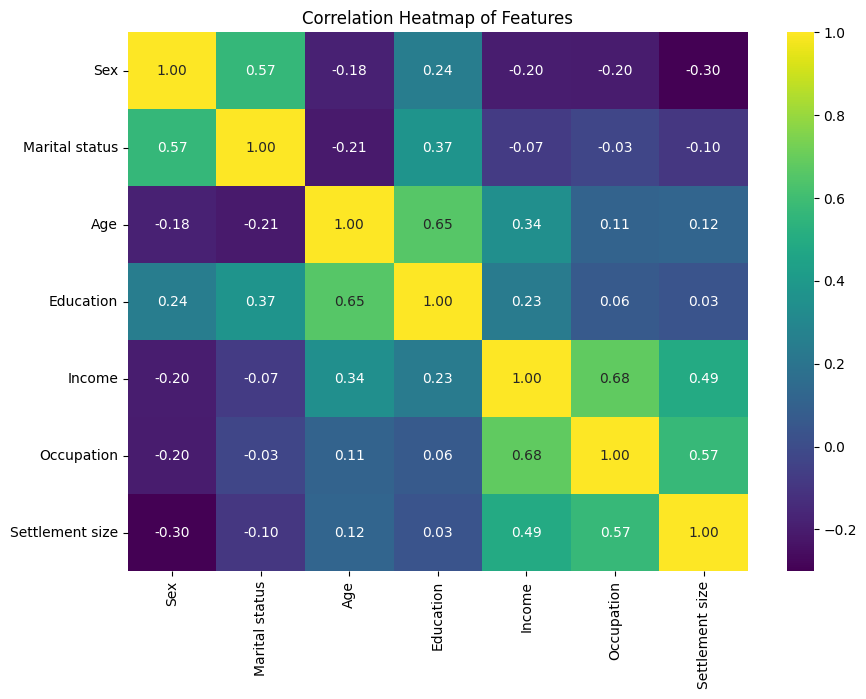

In [122]:
plt.figure(figsize=(10, 7))
corr = X.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Heatmap of Features")
plt.show()

### Heatmap analysis
Overall, no extremely strong correlations appear in the dataset, which is ideal for clustering because each variable contributes distinct information. However, several moderate relationships can be observed:

Income and Occupation (0.68): Individuals with higher professional status tend to earn more, which is expected.

Occupation and Settlement size (0.57): People living in larger urban areas are more likely to have skilled jobs.

Sex and Marital status (0.57): A moderate relationship suggesting that marital status distribution differs between men and women.

Income and Settlement size (0.49): Individuals in larger cities generally earn higher income

The remaining correlations are weak or near zero, which indicates that most features are relatively independent even negative one's. This is beneficial for clustering since the model can use each variable to define meaningful differences between groups without redundancy.

### Importation of the different comparaison models

Comparaison funcion

In [123]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def evalutat_clustering(model, X, labels):
    return {
        "Silhouette": silhouette_score(X,labels),
        "Davis-Bouldin": davies_bouldin_score(X,labels),
        "Calinski-Harabsz": calinski_harabasz_score(X, labels)
    }

Test of the different models

In [124]:
# Test of KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
results_kmeans = evalutat_clustering(kmeans, X, kmeans_labels)

# Test of Agglomerativ Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(X)
results_agg = evalutat_clustering(agg, X, agg_labels)

# Test of DBSCAN
dbscan = DBSCAN(eps=0.8)
dbscan_labels = dbscan.fit_predict(X)
results_dbscan = evalutat_clustering(dbscan, X, dbscan_labels)

# Test Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)
results_gmm = evalutat_clustering(gmm, X, gmm_labels)

In [125]:
results = pd.DataFrame({
    "KMeans": results_kmeans,
    "Agglom": results_agg,
    "DBSCAN": results_dbscan,
    "GMM": results_gmm
})
print(results)

                      KMeans      Agglom      DBSCAN         GMM
Silhouette          0.251677    0.246882    0.277442    0.160249
Davis-Bouldin       1.396581    1.469163    1.377795    3.446939
Calinski-Harabsz  756.412899  648.525975  129.258899  367.737312


| Metric                   |Possible value | Good value   | Acceptable value|Bad value       |Interpretation|
|--------------------------|---------------|--------------|-----------------|--------------|--------------|
| **Silhouette Score**     | -1 à 1           | > 0.50 (good)  |0.25 - 0.50|< 0.25    |High score = clusters well separeted and compact |
| **Davies-Bouldin Index** | ≥ 0              | < 0.7 (good)   |1.5 - 0.7| > 1.5             | Low score = good separation, clusters are compacts |
| **Calinski-Harabasz**    | 0 à +∞           | > 500 (good)   |100 - 500| < 100             | The higher is the value, the better is the separation |

### Analysis of the clustering evaluation
We observe that the silhouette score is highest for DBSCAN, which indicates that clients within the same group are closer to each other and much better separated from clients in other groups than in the other models. KMeans is not far behind, and is the only other model that does not have a poor score.

Davies-Bouldin indicates the algorithm’s ability to form distinct clusters that do not overlap too much and are well separated. The score should be as low as possible because it reflects cluster compactness. And here again, KMeans loses by a small margin to DBSCAN, which means that DBSCAN creates slightly more compact clusters.

Calinski-Harabsz indicates the ratio between the distance between clusters and their compactness.
The score should be as high as possible. This time, KMeans wins by a large margin, while DBSCAN is barely acceptable.

The most interesting model to choose is therefore KMeans, despite scores slightly below DBSCAN on two of the tests. It wins the third test by a wide margin, which compensates for its previous weaknesses.

The good scores observed for DBSCAN can be explained by the fact that it ignores some data points that are too far away, which tends to improve its score. Conversely, KMeans uses all the data and obtains scores very close to DBSCAN in the first two evaluations, which supports its superior robustness in our case.

### Now that we know wich model to choose, we will determine the optimal value of k with the elbow test

For each cluster, we compute the squared distances between all points and the center of the cluster. The inertia is the total sum of these squared distances across all clusters.

Knowing the optimal value of k ensures that the clusters are well-balanced, meaningful, and neither too fragmented nor too broad, wich will lead to more reliable analysis.

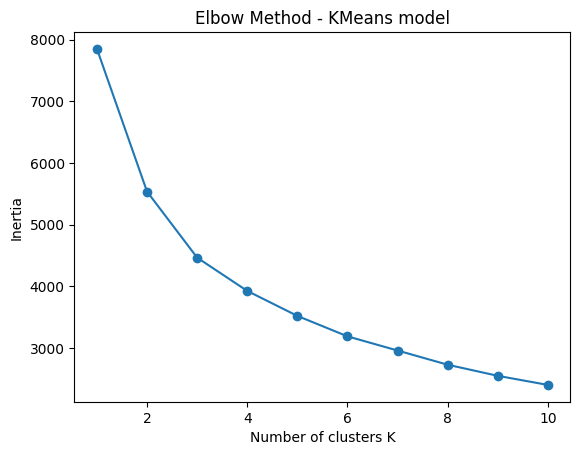

In [126]:
def elbow_plot(X, title):
    inertias = []
    K_values = range(1, 11)

    for k in K_values:
        kmeans = KMeans(n_clusters=k,n_init=10, random_state=0)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    plt.figure()
    plt.plot(K_values, inertias, marker='o')
    plt.xlabel('Number of clusters K')
    plt.ylabel('Inertia')
    plt.title(title)
    plt.show()

elbow_plot(X, "Elbow Method - KMeans model")

We can see the decrease of inertian between 1 and 2 clusters is very large, meaning that adding a second clusters greatly improved compactness. Add more clusters continu to reduc inertia, but the improvment  becomes progessively smaller. When moving form 2 to 3 clusters, the gain is steel meaningful, but beyond 3 clusters the improvement becomes minimal. So 3 appears to be the most appropriate number of cluster for this model. Because it provide the best balance between compactess and simplicity.

### Modelisation of the three clusters with PCA

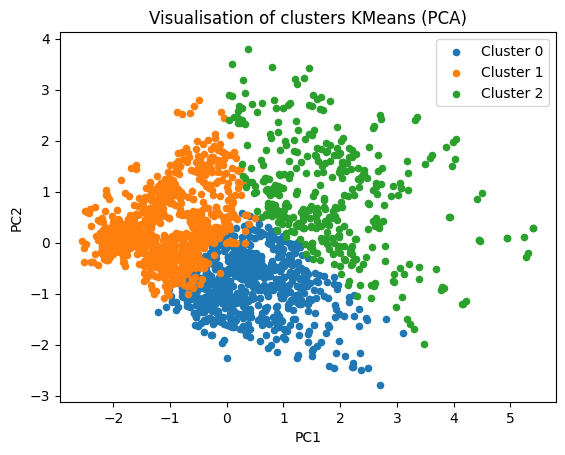

In [127]:
from sklearn.decomposition import PCA

clusters = kmeans_labels
df["Cluster"] = clusters

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X)

for cluster in sorted (df["Cluster"].unique()):
    cluster_point = pca_data[df["Cluster"]==cluster]
    plt.scatter(cluster_point[:, 0], cluster_point[:, 1], s=20, label=f"Cluster {cluster}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisation of clusters KMeans (PCA)")
plt.legend()
plt.show()

### Distribution of the clusters

In [128]:
cluster_summary = df.groupby("Cluster").mean(numeric_only=True)
print(cluster_summary)

                   ID       Sex  Marital status        Age  Education  \
Cluster                                                                 
0        1.000007e+08  0.307263        0.452514  31.272346   0.811453   
1        1.000013e+08  0.624454        0.548035  32.001092   0.924672   
2        1.000008e+08  0.331522        0.453804  54.657609   1.760870   

                Income  Occupation  Settlement size  
Cluster                                              
0        133410.694134    1.182961         1.437151  
1         96653.431223    0.387555         0.040393  
2        157207.168478    1.138587         1.119565  


### Analysis of the clusters

Cluster 0

We can observe that the first cluster corresponds to a relatively young part of the population 31 years old. With a majority of men 70%. Individuals marital status is balanced, but with a stronger tendancy to be single, have a hight-school of education, live in large cities, have a job, and consequently earn relatively high incomes, around 133 000 $ a year.

Cluster 1

We can observe that the second cluster also corresponds to a rather young part of the population 32 years old. With a majority of women 62%. Individuals marital status is balanced, but with a stronger tendancy to be in a relationship, have a slightly more people with a  hight-school level of education than in the previous cluster, live in small cities, have more difficulty finding a job, and therefore earn lower incomes on average, around 97 000 $ a year.

Cluster 2

We can observe that the third cluster corresponds to an older part of the population 54 years old. With a majority of men 67%. Like in first cluster, individuals marital status is balanced, but with a stronger tendancy to be single, and their level of education is generally higher than in the other two clusters with a majoritie of people with university level. They tend to live in medium-sized cities, have a job, and earn the highest income among all clusters, around 157 000 $ a year.

### Modelisation of our results
Comparaison of Income between ich clusters

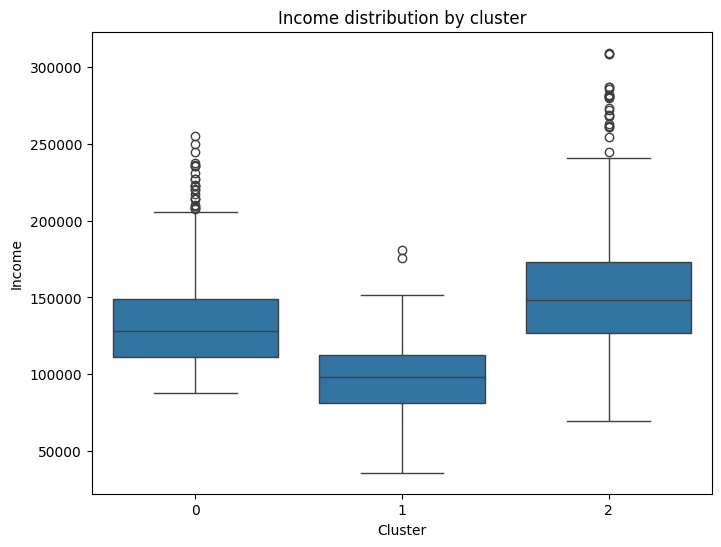

In [129]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Cluster"], y=df["Income"])
plt.title("Income distribution by cluster")
plt.xlabel("Cluster")
plt.ylabel("Income")
plt.show()

Comparaison of Age between ich clusters

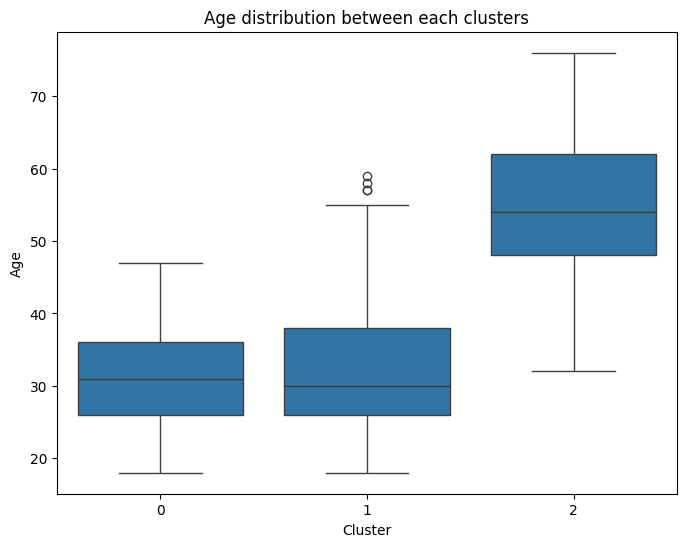

In [134]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Cluster"], y=df["Age"])
plt.title("Age distribution between each clusters")
plt.xlabel("Cluster")
plt.ylabel("Age")
plt.show()

Comparaison of Education between ich clusters

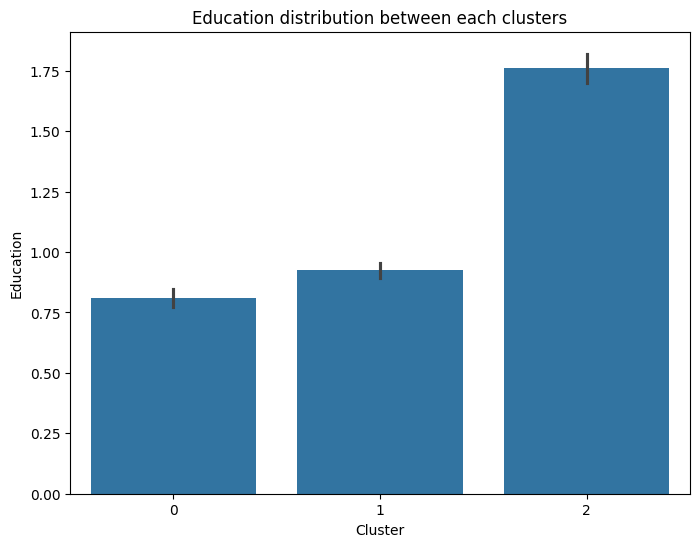

In [135]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df["Cluster"], y=df["Education"])
plt.title("Education distribution between each clusters")
plt.xlabel("Cluster")
plt.ylabel("Education")
plt.show()

Comparaison of Settlement size between ich clusters

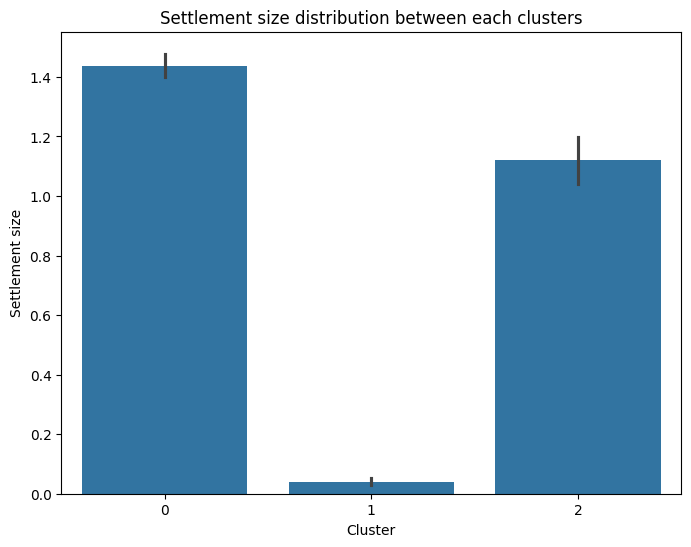

In [136]:
plt.figure(figsize=(8, 6))
sns.barplot(x=df["Cluster"], y=df["Settlement size"])
plt.title("Settlement size distribution between each clusters")
plt.xlabel("Cluster")
plt.ylabel("Settlement size")
plt.show()

#### With all of this data, we can enderstand that:

cluster 0 correspond to young people living in big city, they have good revenue but not to much neither. So accessible product with a big frequence of utilisation can be interesting. For exemple streaming subscription, and other of product related entertainment.

cluster 1 represent young people who don't have a lot of revenue, maybe students or young workers. For them abordable product should be prioritesed.

cluster 2 correspond more to older peoples who live's in medium cities and have a lot of revenus. For them premium services or durable goods like watches should be prioritiesed.

In [133]:
nouveau_client = [[0,0,60,1,40000,0,2]]
age_income = [[nouveau_client[0][2], nouveau_client[0][4]]]
age_income_scaled = scaler.transform(age_income)
nouveau_client_scaled = nouveau_client.copy()
nouveau_client_scaled[0][2]= age_income_scaled[0][0]
nouveau_client_scaled[0][4] = age_income_scaled[0][1]
cluster = kmeans.predict(nouveau_client_scaled)
print("Cluster predicted :", cluster[0])



Cluster predicted : 1


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


### In the end
Clustering analysis enabled us to identify three clearly distinct customer groups based on income, education level, age, and settlement type — key variables for understanding potential customers.

When analyzing these groups, we observe specific needs linked to their socio-economic situation. Young urban earners, low-income young adults, and high-income older individuals each represent relevant targets for different marketing strategies.

Overall, this segmentation allows the company to base its decisions on facts rather than intuition, improving its understanding of customer diversity and supporting more effective and data-driven business strategies.

-----------------
Par : Liam Croguennec - Baptist Jeanjean - Valentin Auffray - Raphael Girard